In [1]:
import pandas as pd
import datetime
import numpy as np
import os
from acoustic_data_science import config, helpers
import matplotlib.pyplot as plt
import logging


In [2]:
df = pd.read_csv(
    config.processed_data_path
    + "/cambridge_bay_sea_ice_properties_from_ice_charts.csv"
)

ice_properties = [
    "total_concentration",
    "stage_of_development",
    "mean_temperature",
]

In [3]:
df = pd.read_csv(
    config.processed_data_path
    + "/cambridge_bay_sea_ice_properties_from_ice_charts.csv"
)

2021-12-17 23:06:46,831 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-12-17 23:06:46,834 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-12-17 23:06:46,836 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-12-17 23:06:46,839 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-12-17 23:06:46,

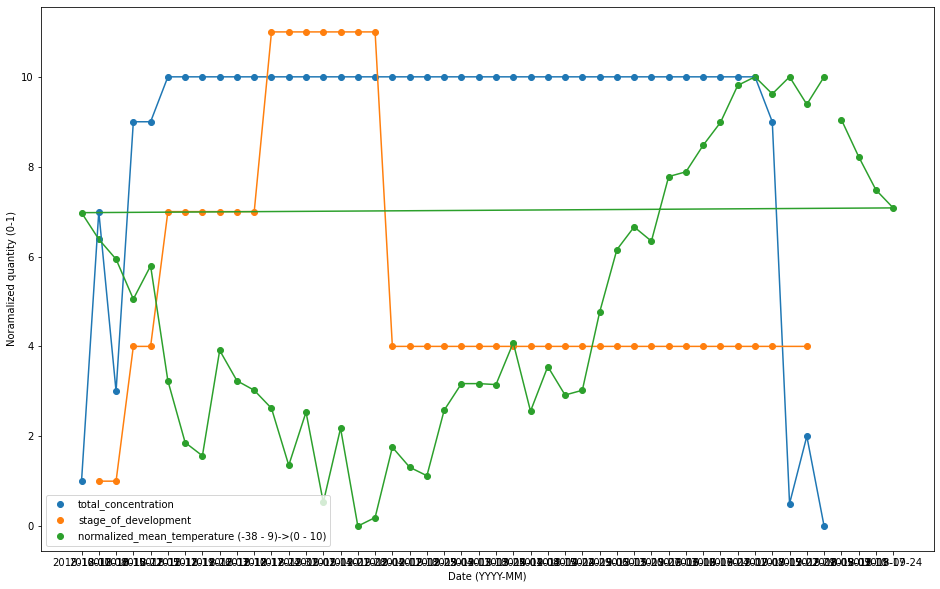

In [4]:
plt.figure(figsize=(16, 10))
for i, ice_property in enumerate(ice_properties):
    mask = df[ice_property].notnull()
    x = df["timestamp"][mask]
    y = df[ice_property][mask]
    # Min-max normalization
    # https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
    if ice_property == "mean_temperature":
        y_norm = (y - y.min()) / (y.max() - y.min()) * 10
        ice_property = (
            f"normalized_mean_temperature ({y.min():.0f} -"
            f" {y.max():.0f})->(0 - 10)"
        )
    else:
        y_norm = y
    plt.plot(x, y_norm,)
    plt.scatter(x, y_norm, label=ice_property)

plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Noramalized quantity (0-1)")
plt.legend(loc="lower left")
figure_path = helpers.get_figure_path(
    "multiple_ice_coverage_properties_as_one_plot", "ice_coverage"
)
plt.savefig(figure_path)

In [5]:
pd.read_csv(config.external_data_path + '/cambridge_bay_sea_ice_properties_from_ice_charts.csv').head(3)

,Date,total_concentration,stage_of_development,form_of_ice,mean_temperature
0,03/09/2018,0,NaN,NaN,4.9
1,10/09/2018,0,NaN,NaN,1.0
2,17/09/2018,0,NaN,NaN,-2.5


In [6]:
ice_maps_df = pd.read_csv(
    config.external_data_path
    + "/cambridge_bay_sea_ice_properties_from_ice_charts.csv", dtype={"stage_of_development":object})

ice_maps_df["total_concentration"] = ice_maps_df["total_concentration"].replace("<1", 0.5).astype("float")
ice_maps_df["timestamp"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
ice_maps_df = ice_maps_df.sort_values("timestamp", ignore_index=True)
ice_maps_df

,Date,total_concentration,stage_of_development,form_of_ice,mean_temperature,timestamp
0,03/09/2018,0.0,NaN,NaN,4.9,2018-09-03
1,10/09/2018,0.0,NaN,NaN,1.0,2018-09-10
2,17/09/2018,0.0,NaN,NaN,-2.5,2018-09-17
3,24/09/2018,0.0,NaN,NaN,-4.4,2018-09-24
4,01/10/2018,1.0,NaN,NaN,-4.9,2018-10-01
5,08/10/2018,7.0,1,NaN,-7.7,2018-10-08
6,15/10/2018,3.0,1,8.0,-9.8,2018-10-15
7,22/10/2018,9.0,4,8.0,-14.0,2018-10-22
8,05/11/2018,9.0,4,8.0,-10.5,2018-11-05
9,12/11/2018,10.0,7,8.0,-22.6,2018-11-12


In [7]:
spl_daily_df = pd.read_feather(config.processed_data_path + '/whole_year/whole_year.feather').groupby(pd.Grouper(key="timestamp", freq='1D')).mean().reset_index()
spl_daily_df

,timestamp,broadband_spl,background_spl
0,2018-08-02,-64.498680,-64.510630
1,2018-08-03,-67.003223,-55.426863
2,2018-08-04,-60.066278,-60.076779
3,2018-08-05,-63.827351,-63.796260
4,2018-08-06,-63.099422,-63.087224
...,...,...,...
298,2019-05-27,-66.930970,-66.921874
299,2019-05-28,-68.869104,-68.898533
300,2019-05-29,-66.783812,-66.647431
301,2019-05-30,-67.886848,-67.863249


In [8]:
temperature_daily_df = pd.read_feather(config.processed_data_path + '/daily_temperature_cambay_shorestation.feather')
temperature_daily_df

,timestamp,mean_temperature
0,2018-08-01,6.600901
1,2018-08-02,6.107467
2,2018-08-03,6.299008
3,2018-08-04,8.332302
4,2018-08-05,7.277796
...,...,...
358,2019-07-25,5.329940
359,2019-07-26,5.365808
360,2019-07-27,6.282461
361,2019-07-28,7.126437


In [9]:
daily_transients = pd.read_feather(config.processed_data_path + "/transient_timestamps_and_durations/whole_year.feather").groupby(pd.Grouper(key="timestamp", freq='1D')).size()
daily_transients_df = pd.DataFrame({"timestamp":daily_transients.index, "no_transients":daily_transients.values})
daily_transients_df

,timestamp,no_transients
0,2018-08-02,603
1,2018-08-03,0
2,2018-08-04,273
3,2018-08-05,398
4,2018-08-06,1112
...,...,...
298,2019-05-27,2259
299,2019-05-28,1859
300,2019-05-29,271
301,2019-05-30,2704


In [10]:
from datetime import datetime
onset_sod_1 = datetime.strptime('08/10/2018', '%d/%m/%Y')
onset_sod_4 = datetime.strptime('22/10/2018', '%d/%m/%Y')
onset_sod_7 = datetime.strptime('12/11/2018', '%d/%m/%Y')
onset_sod_1dot = datetime.strptime('24/12/2018', '%d/%m/%Y')
onset_sod_4dot = datetime.strptime('11/02/2019', '%d/%m/%Y')

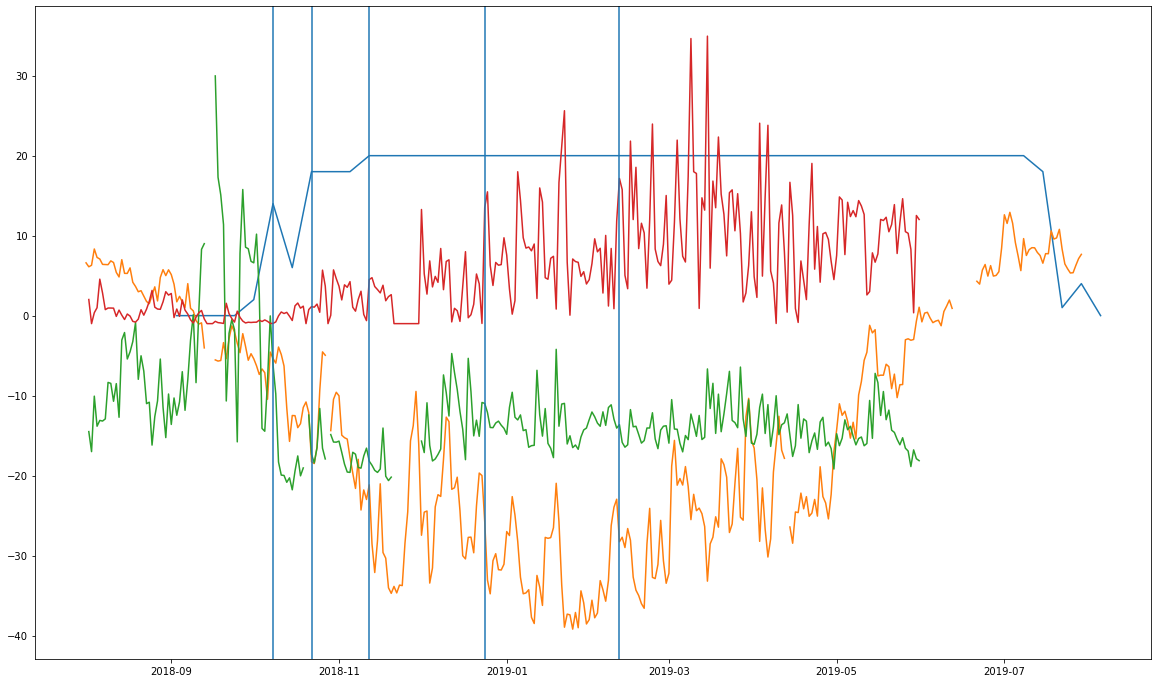

In [11]:
plt.figure(figsize=(20,12))
plt.plot(ice_maps_df["timestamp"], ice_maps_df["total_concentration"]*2)
plt.plot(temperature_daily_df["timestamp"], temperature_daily_df["mean_temperature"])
plt.plot(spl_daily_df["timestamp"], spl_daily_df["broadband_spl"]+50)
plt.plot(daily_transients_df["timestamp"], (daily_transients_df["no_transients"]-200)/200)
plt.axvline(onset_sod_1)
plt.axvline(onset_sod_4)
plt.axvline(onset_sod_7)
plt.axvline(onset_sod_1dot)
plt.axvline(onset_sod_4dot)

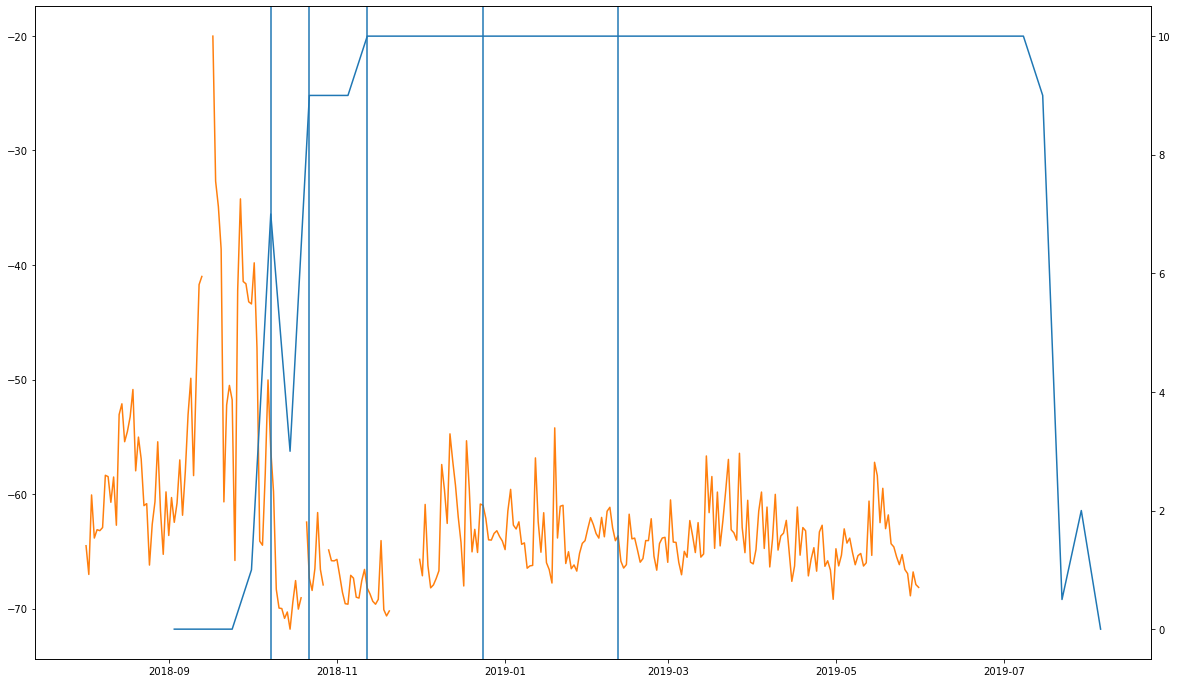

In [12]:
fig, ax = plt.subplots(1,1,figsize=(20,12))

ax.plot(np.nan, np.nan)
ax.plot(spl_daily_df["timestamp"], spl_daily_df["broadband_spl"])
ax2 = ax.twinx()
ax2.plot(ice_maps_df["timestamp"], ice_maps_df["total_concentration"])
ax.axvline(onset_sod_1)
ax.axvline(onset_sod_4)
ax.axvline(onset_sod_7)
ax.axvline(onset_sod_1dot)
ax.axvline(onset_sod_4dot)

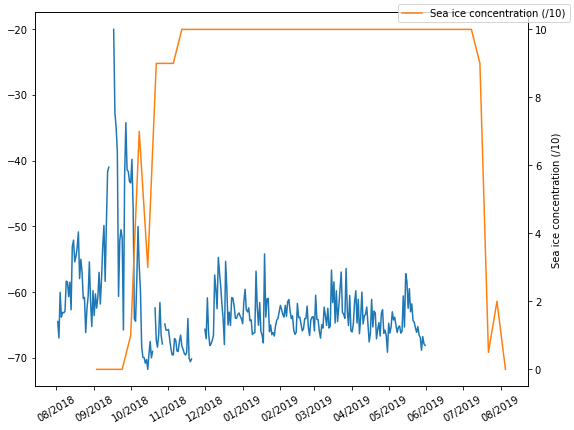

In [34]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(spl_daily_df["timestamp"], spl_daily_df["broadband_spl"])
ax2.set_ylabel(r"Broadband SPL")

ax2 = ax.twinx()
#ax2.plot(temperature_daily_df["timestamp"], temperature_daily_df["mean_temperature"], label=r"Daily mean temperature ($\degree$C)", c="tab:orange")
ax2.set_ylabel(r"Daily mean temperature ($\degree$C)")
ax2.plot(ice_maps_df["timestamp"], ice_maps_df["total_concentration"], label="Sea ice concentration (/10)", color="tab:orange")
ax2.set_ylabel("Sea ice concentration (/10)")

fig.legend()
#fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.setp(ax.get_xticklabels(), rotation=30)

'''
ax.axvline(onset_sod_1)
ax.axvline(onset_sod_4)
ax.axvline(onset_sod_7)
ax.axvline(onset_sod_1dot)
ax.axvline(onset_sod_4dot)
'''
fig.savefig('/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/figures/concentration_thickness.jpg', dpi=300)
plt.show()


1 - New ice, <10 cm
4 - Grey ice, 10-15 cm
7 - Thin first year ice, 30-70 cm
1. - Medium first year ice, 70-120 cm
4. - Thick first year ice, >120cm